In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# csv 파일을 읽어온다.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]

In [3]:
# 테스트에 사용할 컬럼들이 어떤 게 있는지 확인한다.
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# 맨 위 다섯개를 확인하여, 데이터가 어떤 식으로 구현되는지 체크한다. 이름, 성별, Ticket, Cabin, Embarked는 숫자 데이터가 아니다.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 정보를 확인한다. Age, Cabin, Embarked 는 데이터가 모자라다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# 데이터를 확인한다. 다음과 같은 사항을 확인할 수 있다.
# 1. 생존은 카테고리 데이터이다 (0, 1)
# 2. Pclass는 1,2,3 중 하나이다.
# 3. 나이에서 제일 어린건 4개월, 제일 나이 많은건 80살
# 4. 제일 비싸게 주고 탄 사람은 512달러
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ball, Mrs. (Ada E Hall)",male,1601,B96 B98,S
freq,1,577,7,4,644


위에서 데이터를 확인하였다. 이제 데이터 사이의 연관관계를 찾고 싶다.
먼저 Pclass와 Serviced 사이에 어떤 연관관계가 있는지 알고 싶다. 1등석에 탄 사람이 생존률이 높았을까?


In [8]:

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


데이터로 미루어 보아, 1등석에 탄 사람이 생존률이 높았음을 알 수 있다. 성별와 생존률의 관계는 어떻게 될까?

In [9]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


여자가 남자보다 생존률이 유의미하게 높다. 성별과 생존률 사이에는 연관관계가 존재한다.

In [10]:
train[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


형제의 수와 생존률도 연관이 있음을 확인할 수 있다.

In [11]:
train[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [12]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['Parch', 'SibSp', 'FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize     Parch     SibSp  Survived
0           1  0.000000  0.000000  0.303538
1           2  0.236025  0.763975  0.552795
2           3  1.127451  0.872549  0.578431
3           4  1.655172  1.344828  0.724138
4           5  1.866667  2.133333  0.200000
5           6  2.181818  2.818182  0.136364
6           7  2.750000  3.250000  0.333333
7           8  2.666667  4.333333  0.000000
8          11  2.000000  8.000000  0.000000


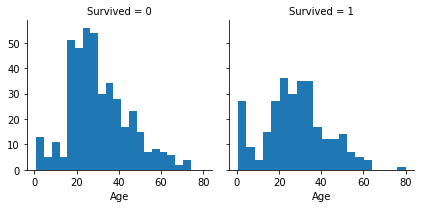

In [13]:
q = sns.FacetGrid(train, col='Survived')
q.map(plt.hist, 'Age', bins=20)

In [14]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


1. 젊은 사람이 많이 죽었다.
2. 어린 애들이 많이 살았다.
3. 노인들은 다 살았다.

In [15]:
train[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).agg(['mean', 'count'])

Survived      
                       mean count
Ticket                           
110152             1.000000     3
110413             0.666667     3
110465             0.000000     2
110564             1.000000     1
110813             1.000000     1
111240             0.000000     1
111320             0.000000     1
111361             1.000000     2
111369             1.000000     1
111426             1.000000     1
111427             1.000000     1
111428             1.000000     1
112050             0.000000     1
112052             0.000000     1
112053             1.000000     1
112058             0.000000     1
112059             0.000000     1
112277             1.000000     1
112379             0.000000     1
113028             0.000000     1
113043             0.000000     1
113050             0.000000     1
113051             0.000000     1
113055             1.000000     1
113056             0.000000     1
113059             0.000000     1
113501             0.000000     1
113503             0.000000     1
113505             1.000000     2
113509             0.000000     1
...                     ...   ...
SOTON/OQ 392082    0.000000     1
SOTON/OQ 392086    0.000000     1
SOTON/OQ 392089    1.000000     1
SOTON/OQ 392090    0.000000     1
STON/O 2. 3101269  1.000000     1
STON/O 2. 3101273  0.000000     1
STON/O 2. 3101274  0.000000     1
STON/O 2. 3101275  0.000000     1
STON/O 2. 3101280  0.000000     1
STON/O 2. 3101285  1.000000     1
STON/O 2. 3101286  1.000000     1
STON/O 2. 3101288  1.000000     1
STON/O 2. 3101289  1.000000     1
STON/O 2. 3101292  0.000000     1
STON/O 2. 3101293  0.000000     1
STON/O 2. 3101294  0.000000     1
STON/O2. 3101271   0.000000     1
STON/O2. 3101279   0.500000     2
STON/O2. 3101282   1.000000     1
STON/O2. 3101283   1.000000     1
STON/O2. 3101290   0.000000     1
SW/PP 751          1.000000     1
W./C. 14258        1.000000     1
W./C. 14263        0.000000     1
W./C. 6607         0.000000     2
W./C. 6608         0.000000     4
W./C. 6609         0.000000     1
W.E.P. 5734        0.000000     1
W/C 14208          0.000000     1
WE/P 5735          0.500000     2

[681 rows x 2 columns]

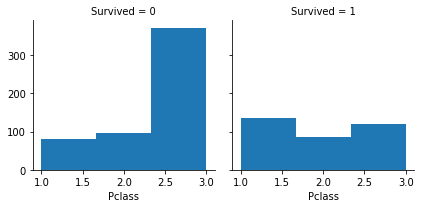

In [16]:
q = sns.FacetGrid(train, col='Survived')
q.map(plt.hist, 'Pclass', bins=3)

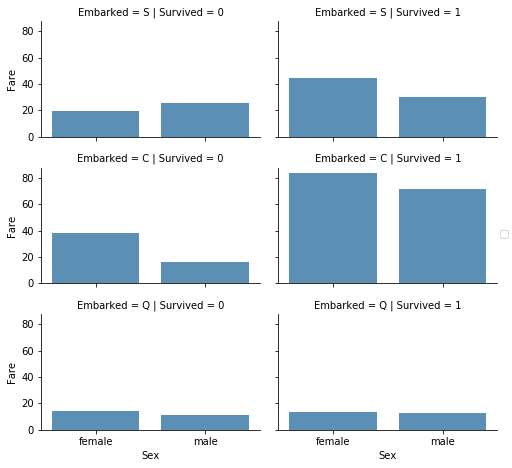

In [17]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.8, ci=None)
grid.add_legend()

In [18]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [19]:
train[['Embarked', 'Fare']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Fare', ascending=False)

,Embarked,Fare
0,C,59.954144
2,S,27.079812
1,Q,13.276030


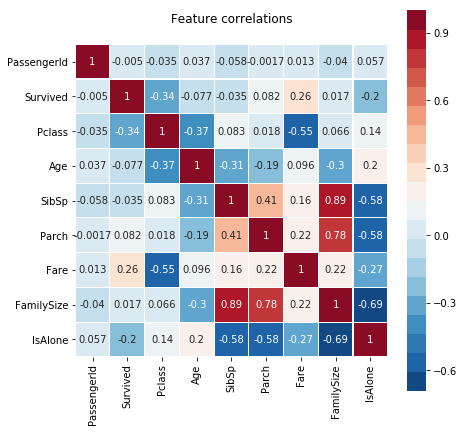

In [20]:
colormap = plt.cm.viridis
plt.figure(figsize=(7,7))
plt.title('Feature correlations', y=1.05, size=12)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=sns.color_palette("RdBu_r",20), linecolor='white', annot=True)

In [21]:
# We are dropping the attributes from both test and training datasets to maintain consistency
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]

In [22]:
for dataset in combine:
    dataset['Salutation'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Salutation'], train['Sex'])

Sex,female,male
Salutation,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [23]:
for dataset in combine:
    dataset['Salutation'] = dataset['Salutation'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Salutation'] = dataset['Salutation'].replace('Mlle', 'Miss')
    dataset['Salutation'] = dataset['Salutation'].replace('Ms', 'Miss')
    dataset['Salutation'] = dataset['Salutation'].replace('Mme', 'Mrs')
    
train[['Salutation', 'Survived']].groupby(['Salutation'], as_index=False).mean()

,Salutation,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [24]:
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Salutation'] = dataset['Salutation'].map(Salutation_mapping)
    dataset['Salutation'] = dataset['Salutation'].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,1


In [25]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]

In [26]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Salutation
0,0,3,male,22.0,1,0,7.2500,S,2,0,1
1,1,1,female,38.0,1,0,71.2833,C,2,0,3
2,1,3,female,26.0,0,0,7.9250,S,1,1,2
3,1,1,female,35.0,1,0,53.1000,S,2,0,3
4,0,3,male,35.0,0,0,8.0500,S,1,1,1


이제 문자로 된 것들을 숫자로 변화시키겠습니다.

In [27]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Salutation
0,0,3,0,22.0,1,0,7.2500,S,2,0,1
1,1,1,1,38.0,1,0,71.2833,C,2,0,3
2,1,3,1,26.0,0,0,7.9250,S,1,1,2
3,1,1,1,35.0,1,0,53.1000,S,2,0,3
4,0,3,0,35.0,0,0,8.0500,S,1,1,1


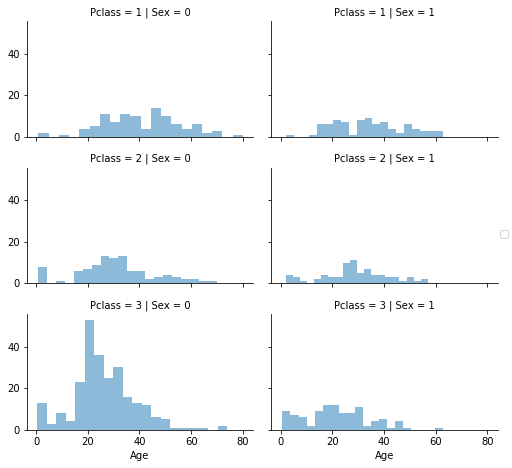

In [28]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [29]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [30]:
# 티켓 같은사람 찾는 거 가능할거같음 ----
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Salutation
0,0,3,0,22,1,0,7.2500,S,2,0,1
1,1,1,1,38,1,0,71.2833,C,2,0,3
2,1,3,1,26,0,0,7.9250,S,1,1,2
3,1,1,1,35,1,0,53.1000,S,2,0,3
4,0,3,0,35,0,0,8.0500,S,1,1,1


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      889 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Salutation    891 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 76.6+ KB


In [32]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [33]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Salutation,AgeBand
0,0,3,0,1,1,0,7.2500,S,2,0,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,2,0,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,1,1,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,2,0,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,1,1,"(32.0, 48.0]"


In [34]:
#for dataset in combine :
#    dataset.query('Age < 3')
train.query('Age < 3').describe()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Salutation
count,811.000000,811.00000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,0.383477,2.38471,0.357583,1.143033,0.545006,0.392109,30.707038,1.937115,0.600493,1.697904
std,0.486533,0.80582,0.479584,0.607980,1.142397,0.817486,49.557496,1.662139,0.490099,0.978148
min,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,2.00000,0.000000,1.000000,0.000000,0.000000,7.895800,1.000000,0.000000,1.000000
50%,0.000000,3.00000,0.000000,1.000000,0.000000,0.000000,13.000000,1.000000,1.000000,1.000000
75%,1.000000,3.00000,1.000000,2.000000,1.000000,0.000000,29.412500,2.000000,1.000000,2.000000
max,1.000000,3.00000,1.000000,2.000000,8.000000,6.000000,512.329200,11.000000,1.000000,5.000000


In [35]:
train.query('Age < 2').count()

Survived      595
Pclass        595
Sex           595
Age           595
SibSp         595
Parch         595
Fare          595
Embarked      595
FamilySize    595
IsAlone       595
Salutation    595
AgeBand       595
dtype: int64

In [36]:
freq_port = train.Embarked.dropna().mode()[0]
freq_port


'S'

In [37]:
# Embark를 freq로 채우는 것은 좀 잘못 된 것 같다.. 차라리 drop하는게 낫지 않을까.
for dataset in combine:
    dataset['Embarked'].fillna(freq_port, inplace=True)
    
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [38]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Salutation,AgeBand
0,0,3,0,1,1,0,7.2500,0,2,0,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,1,2,0,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,0,1,1,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,0,2,0,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,0,1,1,1,"(32.0, 48.0]"


In [39]:
# 빈 값이 뭔지 찾는 것 
test.query('Fare != Fare')

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Salutation
152,1044,3,0,3,0,0,NaN,0,1,1,1


In [40]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Salutation
0,892,3,0,2,0,0,7.8292,2,1,1,1
1,893,3,1,2,1,0,7.0000,0,2,0,3
2,894,2,0,3,0,0,9.6875,2,1,1,1
3,895,3,0,1,0,0,8.6625,0,1,1,1
4,896,3,1,1,1,1,12.2875,0,3,0,3


In [41]:
# qcut은 value의 비율로 나눈 것, cut은 category의 값으로 나눈 것 
train['FareBand'] = pd.qcut(train['Fare'], 3)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 8.662]",0.198052
1,"(8.662, 26.0]",0.402778
2,"(26.0, 512.329]",0.559322


In [42]:
# 의미 업음
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [43]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]
    
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Salutation,AgeBand,Age*Class
0,0,3,0,1,1,0,0,0,2,0,1,"(16.0, 32.0]",3
1,1,1,1,2,1,0,3,1,2,0,3,"(32.0, 48.0]",2
2,1,3,1,1,0,0,1,0,1,1,2,"(16.0, 32.0]",3
3,1,1,1,2,1,0,3,0,2,0,3,"(32.0, 48.0]",2
4,0,3,0,2,0,0,1,0,1,1,1,"(32.0, 48.0]",6
5,0,3,0,1,0,0,1,2,1,1,1,"(16.0, 32.0]",3
6,0,1,0,3,0,0,3,0,1,1,1,"(48.0, 64.0]",3
7,0,3,0,0,3,1,2,0,5,0,4,"(-0.08, 16.0]",0
8,1,3,1,1,0,2,1,0,3,0,3,"(16.0, 32.0]",3
9,1,2,1,0,1,0,2,1,2,0,3,"(-0.08, 16.0]",0


In [44]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Salutation,AgeBand,Age*Class
0,0,3,0,1,1,0,0,0,2,0,1,"(16.0, 32.0]",3
1,1,1,1,2,1,0,3,1,2,0,3,"(32.0, 48.0]",2
2,1,3,1,1,0,0,1,0,1,1,2,"(16.0, 32.0]",3
3,1,1,1,2,1,0,3,0,2,0,3,"(32.0, 48.0]",2
4,0,3,0,2,0,0,1,0,1,1,1,"(32.0, 48.0]",6
5,0,3,0,1,0,0,1,2,1,1,1,"(16.0, 32.0]",3
6,0,1,0,3,0,0,3,0,1,1,1,"(48.0, 64.0]",3
7,0,3,0,0,3,1,2,0,5,0,4,"(-0.08, 16.0]",0
8,1,3,1,1,0,2,1,0,3,0,3,"(16.0, 32.0]",3
9,1,2,1,0,1,0,2,1,2,0,3,"(-0.08, 16.0]",0


In [45]:
train.drop(['AgeBand'], axis = 1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Salutation,Age*Class
0,0,3,0,1,1,0,0,0,2,0,1,3
1,1,1,1,2,1,0,3,1,2,0,3,2
2,1,3,1,1,0,0,1,0,1,1,2,3
3,1,1,1,2,1,0,3,0,2,0,3,2
4,0,3,0,2,0,0,1,0,1,1,1,6
5,0,3,0,1,0,0,1,2,1,1,1,3
6,0,1,0,3,0,0,3,0,1,1,1,3
7,0,3,0,0,3,1,2,0,5,0,4,0
8,1,3,1,1,0,2,1,0,3,0,3,3
9,1,2,1,0,1,0,2,1,2,0,3,0


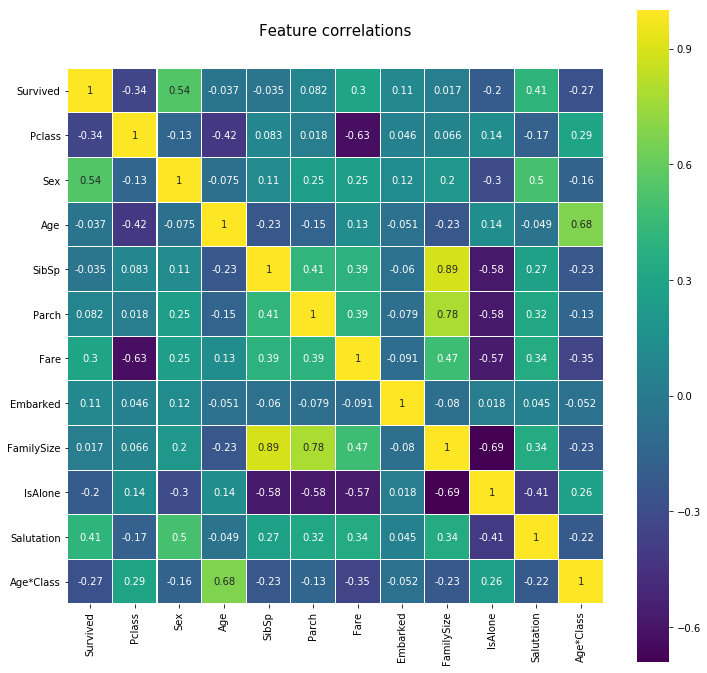

In [46]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Feature correlations', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [47]:
train.drop(['Age*Class'], axis=1) 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Salutation,AgeBand
0,0,3,0,1,1,0,0,0,2,0,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,3,1,2,0,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,1,0,1,1,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,3,0,2,0,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,1,0,1,1,1,"(32.0, 48.0]"
5,0,3,0,1,0,0,1,2,1,1,1,"(16.0, 32.0]"
6,0,1,0,3,0,0,3,0,1,1,1,"(48.0, 64.0]"
7,0,3,0,0,3,1,2,0,5,0,4,"(-0.08, 16.0]"
8,1,3,1,1,0,2,1,0,3,0,3,"(16.0, 32.0]"
9,1,2,1,0,1,0,2,1,2,0,3,"(-0.08, 16.0]"


In [48]:
train = train.drop(['AgeBand', 'Age*Class'],axis =1) 

In [49]:
test = test.drop(['Age*Class'],axis =1) 

In [52]:
import tensorflow as tf
import numpy as np

def _titanic_data_input_fn():
    targets = tf.contrib.learn.extract_pandas_data(train.iloc[:,[0]])
    feature = tf.contrib.learn.extract_pandas_data(train.drop(['Survived'], axis =1))
    return tf.constant(feature), tf.constant(targets)

def DNN():
    feature_columns = [tf.contrib.layers.real_valued_column("", dimension=10)]

  # Build 3 layer DNN with 10, 20, 10 units respectively.
    classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                              hidden_units=[64, 32],
                                              n_classes=2,
                                              optimizer=tf.train.AdamOptimizer(
                                                  learning_rate=0.1   
                                              ),
                                              dropout=0.1,
                                              model_dir="./dnn_model")
    
    
    classifier.fit(input_fn=_titanic_data_input_fn, steps=2000)
 

    accuracy_score = classifier.evaluate(input_fn=_titanic_data_input_fn, steps=1)["accuracy"]
    print('-----------------------정확도: {0:f}'.format(accuracy_score))

    
DNN()


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x117fbcd68>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './dnn_model'}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create Checkpoin

In [55]:
# 테스트, 트레인 데이터를 2:8 비율로 나누어 테스트. 5번 돌린 후 정확도의 평균을 취한다.
# 대략 81~82퍼 근방이 나옴
import os
import tensorflow as tf
import numpy as np
import shutil
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  
# tf.logging.set_verbosity(tf.logging.ERROR)

def _titanic_data_input_fn(data):        
    targets = tf.contrib.learn.extract_pandas_data(data.iloc[:,[0]])
    feature = tf.contrib.learn.extract_pandas_data(data.drop(['Survived'], axis =1))
    return tf.constant(feature), tf.constant(targets)

def DNN(trainData, testData, learning_rate, dropout):
    feature_columns = [tf.contrib.layers.real_valued_column("", dimension=10)]

  # Build 3 layer DNN with 10, 20, 10 units respectively.
    classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                              hidden_units=[64, 32],
                                              n_classes=2,
                                              optimizer=tf.train.AdamOptimizer(
                                                  learning_rate=learning_rate  # 0.1 0.01 0.001
                                              ),
                                              dropout=dropout, # 0.1 0.2 0.3 
                                              model_dir="./dnn_model")
    
    
    classifier.fit(input_fn=lambda: _titanic_data_input_fn(trainData), steps=2000)
 
    accuracy_score = classifier.evaluate(input_fn=lambda: _titanic_data_input_fn(testData), steps=1)["accuracy"]
    print('-----------------------정확도: {0:f}'.format(accuracy_score))
    accuracyList.append(accuracy_score)
    
        
shuffledTrain = train.sample(frac=1)
accuracyList = []
chunkSize = 178

learningRateList = [0.1, 0.01]
dropoutList = [0.1, 0.4]
for i in range(len(learningRateList)):
    for j in range(len(dropoutList)):
        for k in range(5):    
            testData = shuffledTrain[k * chunkSize : chunkSize * (k + 1)]
            trainData = shuffledTrain.drop(testData.index)
            print(k, '번째 루프. testSize', len(testData), 'trainSize', len(trainData))
            print('학습률', learningRateList[i], 'DROPOUT',  dropoutList[j])
            DNN(trainData, testData, learningRateList[i], dropoutList[j])
            shutil.rmtree("./dnn_model")

accuracy = 0
for accuracyTarget in accuracyList:
    print("정확도:", accuracyTarget)
    accuracy += accuracyTarget
print('----정확도 평균: {0:f}'.format(accuracy/5))


0 번째 루프. testSize 178 trainSize 713
학습률 0.1 DROPOUT 0.1
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x119423f28>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './dnn_model'}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op 

INFO:tensorflow:loss = 0.356378, step = 1901 (0.213 sec)
INFO:tensorflow:Saving checkpoints for 2000 into ./dnn_model/model.ckpt.
INFO:tensorflow:Loss for final step: 0.348554.
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-08-02-12:50:27
INFO:tensorflow:Restoring parameters from ./dnn_model/model.ckpt-2000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-08-02-12:50:28
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.853933, accuracy/baseline_label_mean = 0.353933, accuracy/threshold_0.500000_mean = 0.853933, auc = 0.895652, auc_precision_recall = 0.873495, global_step = 2000, labels/actual_label_mean = 0.353933, labels/pre

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./dnn_model/model.ckpt.
INFO:tensorflow:loss = 0.806827, step = 1
INFO:tensorflow:global_step/sec: 454.758
INFO:tensorflow:loss = 0.454161, step = 101 (0.221 sec)
INFO:tensorflow:global_step/sec: 514.361
INFO:tensorflow:loss = 0.449203, step = 201 (0.194 sec)
INFO:tensorflow:global_step/sec: 528.436
INFO:tensorflow:loss = 0.446648, step = 301 (0.189 sec)
INFO:tensorflow:global_step/sec: 521.08
INFO:tensorflow:loss = 0.478323, step = 401 (0.192 sec)
INFO:tensorflow:global_step/sec: 520.986
INFO:tensorflow:loss = 0.435784, step = 501 (0.192 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:Starting evaluation at 2017-08-02-12:51:35
INFO:tensorflow:Restoring parameters from ./dnn_model/model.ckpt-2000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-08-02-12:51:35
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.853933, accuracy/baseline_label_mean = 0.353933, accuracy/threshold_0.500000_mean = 0.853933, auc = 0.901518, auc_precision_recall = 0.880244, global_step = 2000, labels/actual_label_mean = 0.353933, labels/prediction_mean = 0.360119, loss = 0.393644, precision/positive_threshold_0.500000_mean = 0.893617, recall/positive_threshold_0.500000_mean = 0.666667
-----------------------정확도: 0.853933
2 번째 루프. testSize 178 trainSize 713
학습률 0.1 DROPOUT 0.4
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11c0192e8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_en

INFO:tensorflow:global_step/sec: 501.452
INFO:tensorflow:loss = 0.432429, step = 1101 (0.200 sec)
INFO:tensorflow:global_step/sec: 534.359
INFO:tensorflow:loss = 0.433949, step = 1201 (0.186 sec)
INFO:tensorflow:global_step/sec: 543.186
INFO:tensorflow:loss = 0.447566, step = 1301 (0.184 sec)
INFO:tensorflow:global_step/sec: 529.535
INFO:tensorflow:loss = 0.445287, step = 1401 (0.189 sec)
INFO:tensorflow:global_step/sec: 540.633
INFO:tensorflow:loss = 0.471158, step = 1501 (0.185 sec)
INFO:tensorflow:global_step/sec: 538.178
INFO:tensorflow:loss = 0.442039, step = 1601 (0.186 sec)
INFO:tensorflow:global_step/sec: 525.526
INFO:tensorflow:loss = 0.449358, step = 1701 (0.190 sec)
INFO:tensorflow:global_step/sec: 518.188
INFO:tensorflow:loss = 0.410252, step = 1801 (0.193 sec)
INFO:tensorflow:global_step/sec: 539.06
INFO:tensorflow:loss = 0.433858, step = 1901 (0.185 sec)
INFO:tensorflow:Saving checkpoints for 2000 into ./dnn_model/model.ckpt.
INFO:tensorflow:Loss for final step: 0.440243.

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./dnn_model/model.ckpt.
INFO:tensorflow:loss = 0.732853, step = 1
INFO:tensorflow:global_step/sec: 483.741
INFO:tensorflow:loss = 0.334366, step = 101 (0.208 sec)
INFO:tensorflow:global_step/sec: 524.153
INFO:tensorflow:loss = 0.310009, step = 201 (0.191 sec)
INFO:tensorflow:global_step/sec: 527.384
INFO:tensorflow:loss = 0.282818, step = 301 (0.190 sec)
INFO:tensorflow:global_step/sec: 539.77
INFO:tensorflow:loss = 0.263491, step = 401 (0.185 sec)
INFO:tensorflow:global_step/sec: 529.448
INFO:tensorflow:loss = 0.272147, step = 501 (0.189 sec)
INFO:tensorflow:global_step/sec: 517.449
INFO:tensorflow:loss = 0.261778, step = 601 (0.193 sec)
INFO:tensorflow:global_step/sec: 534.257
INFO:tensorflow:loss = 0.255195, step = 701 (0.187 sec)
INFO:tensorflow:global_step/sec: 537.726
INFO:tensorflow:loss = 0.262515, step = 801 (0.186 sec)
INFO:tensorflow:global_step/sec: 536.573
INFO:tensorflow:loss = 0.248

-----------------------정확도: 0.825843
2 번째 루프. testSize 178 trainSize 713
학습률 0.01 DROPOUT 0.1
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1191a2828>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './dnn_model'}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor o

INFO:tensorflow:global_step/sec: 463.304
INFO:tensorflow:loss = 0.22912, step = 1901 (0.216 sec)
INFO:tensorflow:Saving checkpoints for 2000 into ./dnn_model/model.ckpt.
INFO:tensorflow:Loss for final step: 0.234411.
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-08-02-12:53:08
INFO:tensorflow:Restoring parameters from ./dnn_model/model.ckpt-2000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-08-02-12:53:08
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.775281, accuracy/baseline_label_mean = 0.41573, accuracy/threshold_0.500000_mean = 0.775281, auc = 0.803664, auc_precision_recall = 0.794881, global_step = 2000, labels/a

INFO:tensorflow:global_step/sec: 425.57
INFO:tensorflow:loss = 0.359849, step = 301 (0.235 sec)
INFO:tensorflow:global_step/sec: 515.948
INFO:tensorflow:loss = 0.33481, step = 401 (0.194 sec)
INFO:tensorflow:global_step/sec: 501.09
INFO:tensorflow:loss = 0.319108, step = 501 (0.200 sec)
INFO:tensorflow:global_step/sec: 478.567
INFO:tensorflow:loss = 0.320597, step = 601 (0.209 sec)
INFO:tensorflow:global_step/sec: 480.429
INFO:tensorflow:loss = 0.299557, step = 701 (0.208 sec)
INFO:tensorflow:global_step/sec: 482.849
INFO:tensorflow:loss = 0.304938, step = 801 (0.207 sec)
INFO:tensorflow:global_step/sec: 510.715
INFO:tensorflow:loss = 0.309711, step = 901 (0.196 sec)
INFO:tensorflow:global_step/sec: 508.187
INFO:tensorflow:loss = 0.30494, step = 1001 (0.197 sec)
INFO:tensorflow:global_step/sec: 494.533
INFO:tensorflow:loss = 0.298488, step = 1101 (0.203 sec)
INFO:tensorflow:global_step/sec: 502.922
INFO:tensorflow:loss = 0.30152, step = 1201 (0.199 sec)
INFO:tensorflow:global_step/sec:

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into ./dnn_model/model.ckpt.
INFO:tensorflow:loss = 0.801394, step = 1
INFO:tensorflow:global_step/sec: 475.631
INFO:tensorflow:loss = 0.393623, step = 101 (0.211 sec)
INFO:tensorflow:global_step/sec: 503.847
INFO:tensorflow:loss = 0.3568, step = 201 (0.199 sec)
INFO:tensorflow:global_step/sec: 502.565
INFO:tensorflow:loss = 0.360202, step = 301 (0.199 sec)
INFO:tensorflow:global_step/sec: 502.109
INFO:tensorflow:loss = 0.352851, step = 401 (0.199 sec)
INFO:tensorflow:global_step/sec: 497.184
INFO:tensorflow:loss = 0.32557, step = 501 (0.202 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:Starting evaluation at 2017-08-02-12:54:15
INFO:tensorflow:Restoring parameters from ./dnn_model/model.ckpt-2000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-08-02-12:54:16
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.775281, accuracy/baseline_label_mean = 0.41573, accuracy/threshold_0.500000_mean = 0.775281, auc = 0.817503, auc_precision_recall = 0.80443, global_step = 2000, labels/actual_label_mean = 0.41573, labels/prediction_mean = 0.389004, loss = 2.03814, precision/positive_threshold_0.500000_mean = 0.814815, recall/positive_threshold_0.500000_mean = 0.594595
-----------------------정확도: 0.775281
4 번째 루프. testSize 178 trainSize 713
학습률 0.01 DROPOUT 0.4
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1186f05f8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_envir

In [50]:
# 업로드 코드

import tensorflow as tf
import numpy as np
        
def _titanic_data_input_fn(data):        
    targets = tf.contrib.learn.extract_pandas_data(data.iloc[:,[0]])
    feature = tf.contrib.learn.extract_pandas_data(data.drop(['Survived'], axis =1))
    return tf.constant(feature), tf.constant(targets)

def _predct_data(data):
    feature = tf.contrib.learn.extract_pandas_data(data.drop(['PassengerId'], axis =1))
    return tf.constant(feature)

def DNN(trainData, testData):
    feature_columns = [tf.contrib.layers.real_valued_column("", dimension=10)]

  # Build 3 layer DNN with 10, 20, 10 units respectively.
    classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                              hidden_units=[64, 32],
                                              n_classes=2,
                                              optimizer=tf.train.AdamOptimizer(
                                                  learning_rate=0.01   
                                              ),
                                              dropout=0.1,
                                              model_dir="./dnn_model")
    
    
    classifier.fit(input_fn=lambda: _titanic_data_input_fn(trainData), steps=6000)
    result = list(classifier.predict_classes(input_fn=lambda: _predct_data(testData)))

    print(result)
    
    return result
    
        
result = DNN(train, test)

test["Survived"] = result
test[["PassengerId", "Survived"]].to_csv("./result.csv")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x117bc3e10>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './dnn_model'}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create Checkpoin